In [ ]:
import matplotlib.pyplot as plt
import numpy as np

## Generating and Visualizing Time Series Data

In [ ]:
def plot_series(time, series, format="-", start=0, end=None):
    """
    Visualizes time series data

    Args:
      time (array of int) - contains the time steps
      series (array of int) - contains the measurements for each time step
      format - line style when plotting the graph
      label - tag for the line
      start - first time step to plot
      end - last time step to plot
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))

    if type(series) is tuple:

      for series_num in series:
        # Plot the time series data
        plt.plot(time[start:end], series_num[start:end], format)

    else:
      # Plot the time series data
      plt.plot(time[start:end], series[start:end], format)

    # Label the x-axis
    plt.xlabel("Time")

    # Label the y-axis
    plt.ylabel("Value")

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()

In [ ]:
def trend(time, slope=0):
    """
    Generates synthetic data that follows a straight line given a slope value.

    Args:
      time (array of int) - contains the time steps
      slope (float) - determines the direction and steepness of the line

    Returns:
      series (array of float) - measurements that follow a straight line
    """

    # Compute the linear series given the slope
    series = slope * time

    return series

In [ ]:
# Generate time steps. Assume 1 per day for one year (365 days)
time = np.arange(365)

# Define the slope
slope = 2

In [ ]:
# Generate measurements with the defined slope
series = trend(time, slope)

# Plot the results
plot_series(time, series, label=[f'slope={slope}'])

TypeError: plot_series() got an unexpected keyword argument 'label'

In [ ]:
def seasonal_pattern(season_time):
    """
    Just an arbitrary pattern, you can change it if you wish

    Args:
      season_time (array of float) - contains the measurements per time step

    Returns:
      data_pattern (array of float) -  contains revised measurement values according
                                  to the defined pattern
    """

    # Generate the values using an arbitrary pattern
    data_pattern = np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

    return data_pattern

def seasonality(time, period, amplitude=1, phase=0):
    """
    Repeats the same pattern at each period

    Args:
      time (array of int) - contains the time steps
      period (int) - number of time steps before the pattern repeats
      amplitude (int) - peak measured value in a period
      phase (int) - number of time steps to shift the measured values


    Returns:
      data_pattern (array of float) - seasonal data scaled by the defined amplitude
    """

    # Define the measured values per period
    season_time = ((time + phase) % period) / period

    # Generates the seasonal data scaled by the defined amplitude
    data_pattern = amplitude * seasonal_pattern(season_time)

    return data_pattern

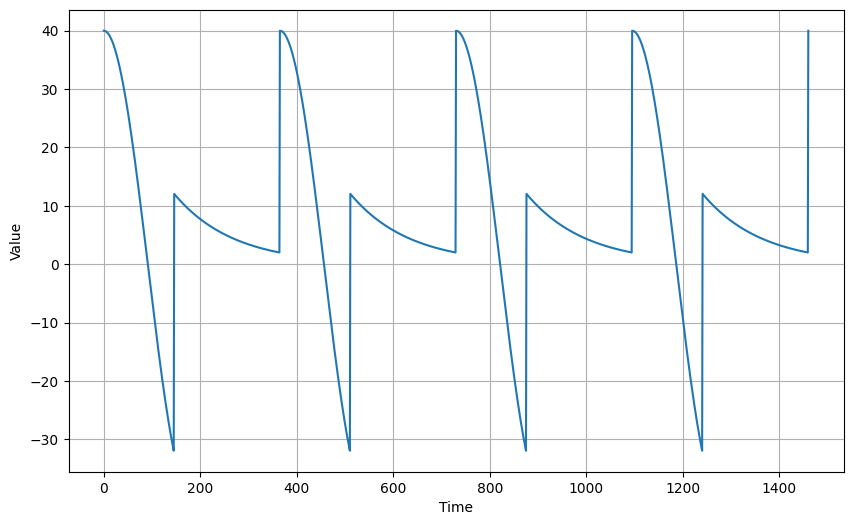

In [ ]:
# Generate time steps
time = np.arange(4 * 365 + 1)

# Define the parameters of the seasonal data
period = 365
amplitude = 40

# Generate the seasonal data
series = seasonality(time, period=period, amplitude=amplitude)

# Plot the results
plot_series(time, series)

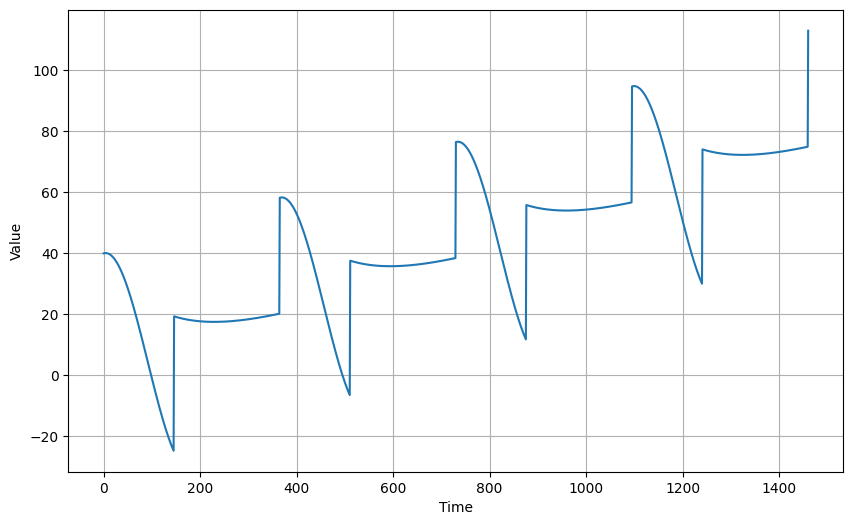

In [ ]:
# Define seasonal parameters
slope = 0.05
period = 365
amplitude = 40

# Generate the data
series = trend(time, slope) + seasonality(time, period=period, amplitude=amplitude)

# Plot the results
plot_series(time, series)

In [ ]:
def noise(time, noise_level=1, seed=None):
    """Generates a normally distributed noisy signal

    Args:
      time (array of int) - contains the time steps
      noise_level (float) - scaling factor for the generated signal
      seed (int) - number generator seed for repeatability

    Returns:
      noise (array of float) - the noisy signal

    """

    # Initialize the random number generator
    rnd = np.random.RandomState(seed)

    # Generate a random number for each time step and scale by the noise level
    noise = rnd.randn(len(time)) * noise_level

    return noise


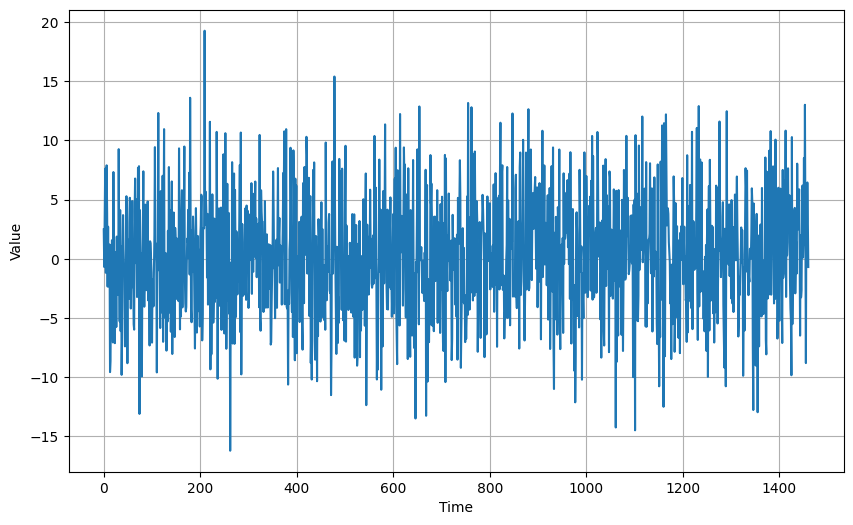

In [ ]:
# Define noise level
noise_level = 5

# Generate noisy signal
noise_signal = noise(time, noise_level=noise_level, seed=42)

# Plot the results
plot_series(time, noise_signal)

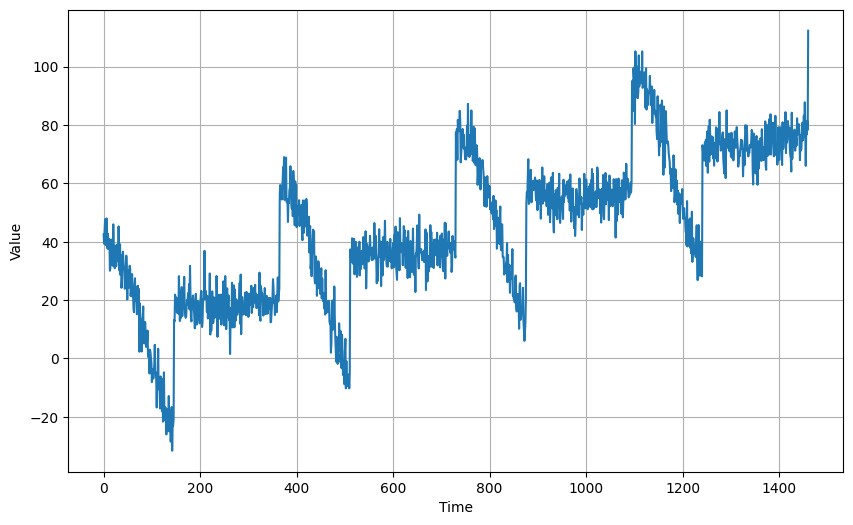

In [ ]:
# Add the noise to the time series
series += noise_signal

# Plot the results
plot_series(time, series)

### Moving Average Smoothening

In [ ]:
def moving_average_forecast(series, window_size):
    """Generates a moving average forecast

    Args:
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to compute the average for

    Returns:
      forecast (array of float) - the moving average forecast
    """

    # Initialize a list
    forecast = []

    # Compute the moving average based on the window size
    for time in range(len(series) - window_size):
      forecast.append(series[time:time + window_size].mean())

    # Convert to a numpy array
    forecast = np.array(forecast)

    return forecast

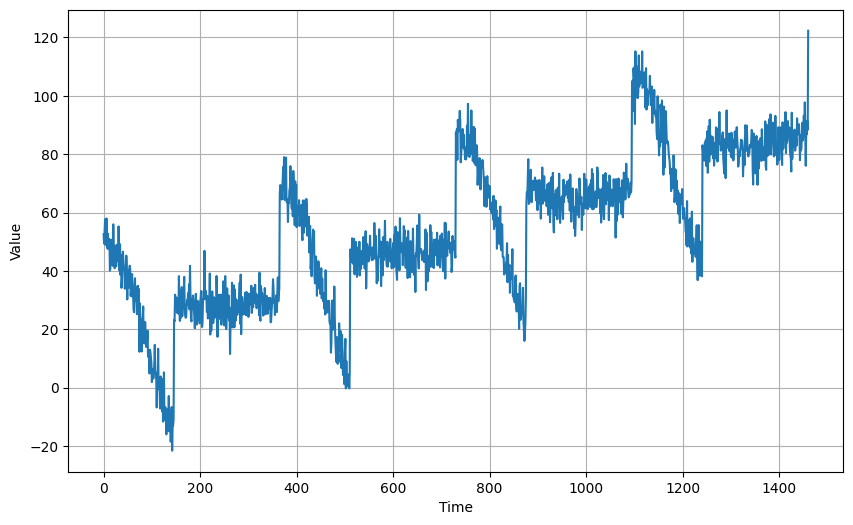

In [ ]:
### Generating Data

# Parameters
time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

# Update with noise
series += noise(time, noise_level, seed=42)

# Plot the results
plot_series(time, series)

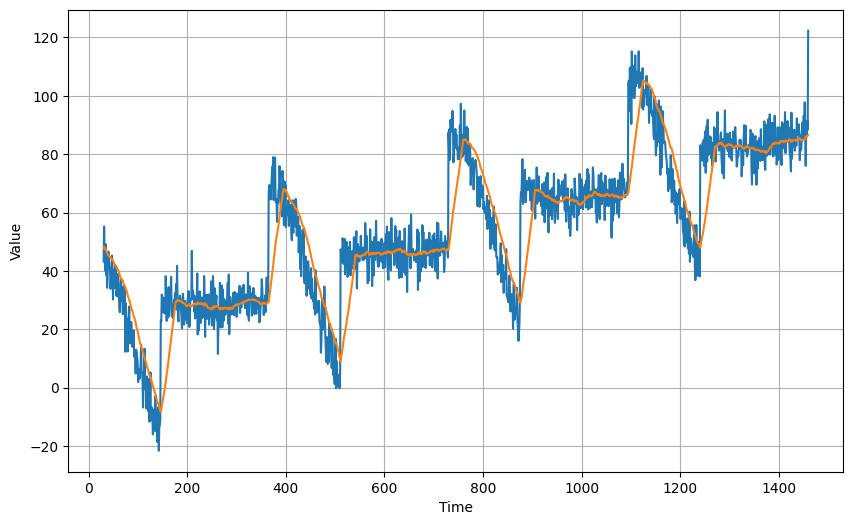

In [ ]:
# Generate the moving average forecast
moving_avg = moving_average_forecast(series, 30)

# Plot the results
plot_series(time[30:], (series[30:], moving_avg))

The moving average does not anticipate trend or seasonality. In particular, those huge spikes in the original series causes big deviations as shown in the plot above.

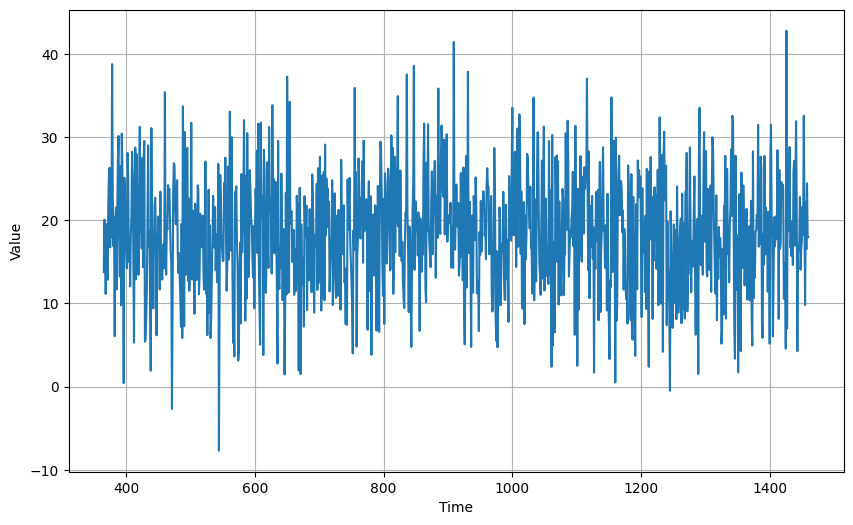

In [ ]:
### Creating Differentiated Time Series Plot

# Subtract the values at t-365 from original series
diff_series = (series[365:] - series[:-365])

# Truncate the first 365 time steps
diff_time = time[365:]

# Plot the results
plot_series(diff_time, diff_series)

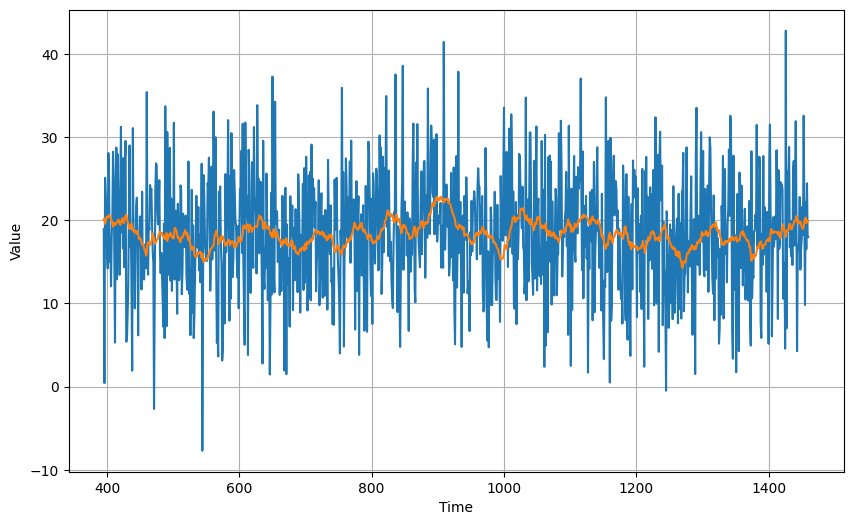

In [ ]:
# Generate moving average from the time differenced dataset
diff_moving_avg = moving_average_forecast(diff_series, 30)

# Plot the results
plot_series(diff_time[30:], (diff_series[30:], diff_moving_avg))

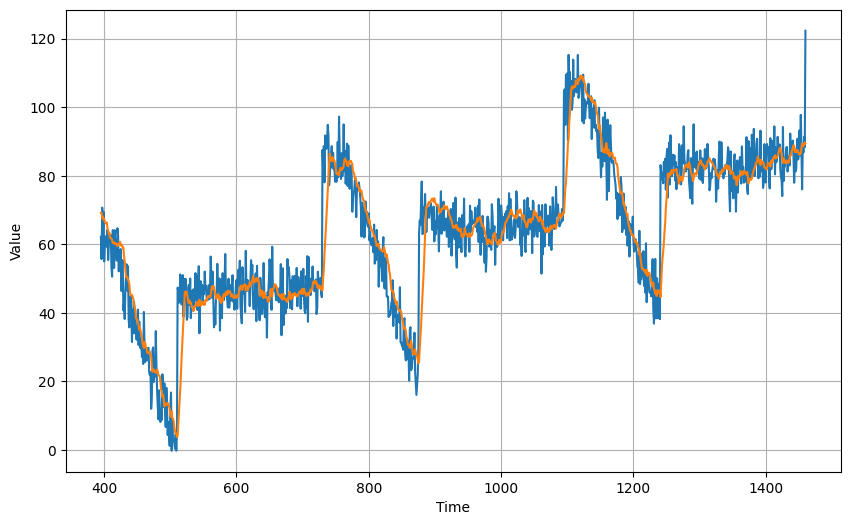

In [ ]:
# To get a more smoothened plot we take moving average and take a trailing window (Here 11) and then add the difference moving average to still incorporate some noise.
# Since differenced moving average is not centred around 0, we subtract the mean of differenced moving average from it.


# Smooth the original series before adding the time differenced moving average
diff_moving_avg_plus_smooth_past = moving_average_forecast(series[365-11+30:], 11)+diff_moving_avg - diff_moving_avg.mean()

# Plot the results
plot_series(time[365+ 30:], (series[365+30:], diff_moving_avg_plus_smooth_past))

## Training a Single Layer Neural Network with Time Series Data

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

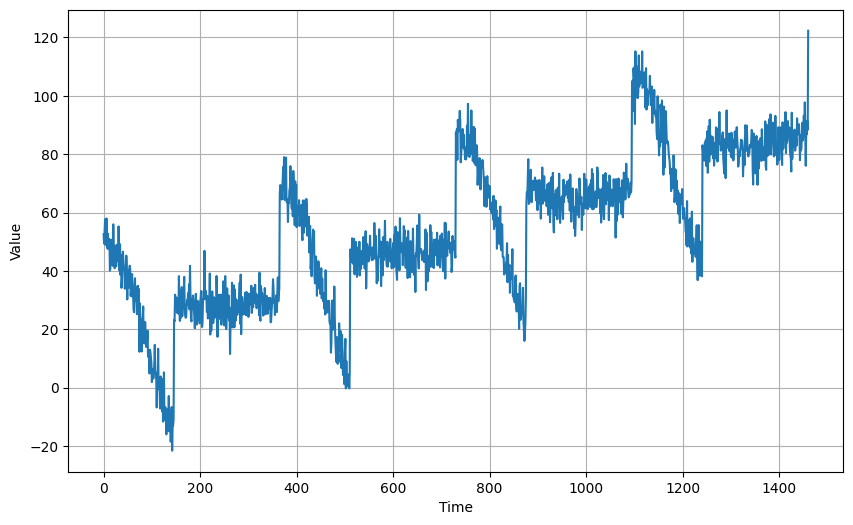

In [ ]:
# Plot the results
plot_series(time, series)

In [ ]:
# Define the split time
split_time = 1000

# Get the train set
time_train = time[:split_time]
x_train = series[:split_time]

# Get the validation set
time_valid = time[split_time:]
x_valid = series[split_time:]

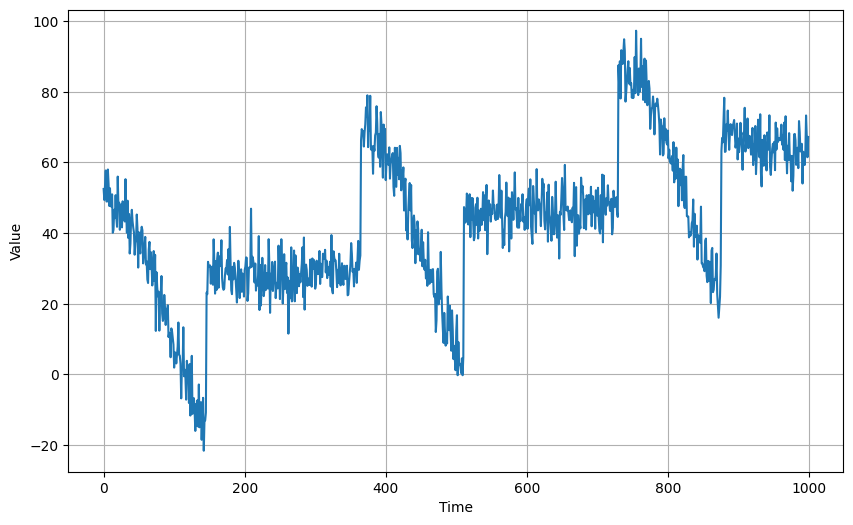

In [ ]:
# Plot the train set
plot_series(time_train, x_train)

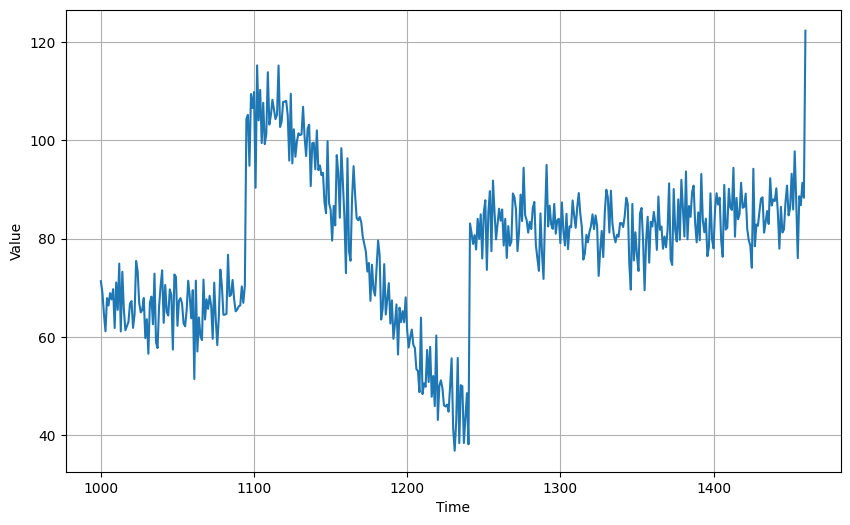

In [ ]:
# Plot the validation set
plot_series(time_valid, x_valid)

Prepare lag window for autoregressive model

In [ ]:
# Parameters
window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    """Generates dataset windows

    Args:
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to include in the feature
      batch_size (int) - the batch size
      shuffle_buffer(int) - buffer size to use for the shuffle method

    Returns:
      dataset (TF Dataset) - TF Dataset containing time windows
    """

    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)

    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))

    # Create tuples with features and labels
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))

    # Shuffle the windows
    dataset = dataset.shuffle(shuffle_buffer)

    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)

    return dataset

In [ ]:
# Generate the dataset windows
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

In [ ]:
# Build the single layer neural network
l0 = tf.keras.layers.Dense(1, input_shape=[window_size])
model = tf.keras.models.Sequential([l0])

# Print the initial layer weights
print("Layer weights: \n {} \n".format(l0.get_weights()))

# Print the model summary
model.summary()

Layer weights: 
 [array([[-0.40799677],
       [ 0.33631694],
       [ 0.403773  ],
       [ 0.3771419 ],
       [ 0.35291654],
       [ 0.41957378],
       [-0.0282017 ],
       [-0.5247969 ],
       [-0.01191998],
       [ 0.46933347],
       [-0.3418616 ],
       [-0.26364538],
       [-0.08060381],
       [ 0.23825407],
       [ 0.4344769 ],
       [-0.12720013],
       [ 0.20748651],
       [-0.17911947],
       [ 0.41074526],
       [-0.49816242]], dtype=float32), array([0.], dtype=float32)] 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 21 (84.00 Byte)
Trainable params: 21 (84.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Set the training parameters
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9))

In [ ]:
# Train the model
model.fit(dataset,epochs=100)

Epoch 1/100
31/31 [==============================] - 1s 2ms/step - loss: 268.9243
Epoch 2/100
31/31 [==============================] - 0s 2ms/step - loss: 194.9626
Epoch 3/100
31/31 [==============================] - 0s 2ms/step - loss: 158.9062
Epoch 4/100
31/31 [==============================] - 0s 2ms/step - loss: 136.1462
Epoch 5/100
31/31 [==============================] - 0s 2ms/step - loss: 123.3795
Epoch 6/100
31/31 [==============================] - 0s 2ms/step - loss: 114.5444
Epoch 7/100
31/31 [==============================] - 0s 2ms/step - loss: 108.4855
Epoch 8/100
31/31 [==============================] - 0s 2ms/step - loss: 103.9955
Epoch 9/100
31/31 [==============================] - 0s 2ms/step - loss: 101.8708
Epoch 10/100
31/31 [==============================] - 0s 2ms/step - loss: 98.2060
Epoch 11/100
31/31 [==============================] - 0s 2ms/step - loss: 95.0362
Epoch 12/100
31/31 [==============================] - 0s 2ms/step - loss: 94.0838
Epoch 13/100
31/

In [ ]:
# Print the layer weights
print("Layer weights {}".format(l0.get_weights()))

Layer weights [array([[-0.11626062],
       [ 0.04725091],
       [ 0.04964535],
       [-0.0016448 ],
       [ 0.03436551],
       [ 0.06387421],
       [-0.02899329],
       [-0.09405783],
       [ 0.00089092],
       [ 0.1290746 ],
       [-0.05422928],
       [-0.05857475],
       [-0.04477026],
       [ 0.07746   ],
       [ 0.08396856],
       [-0.0073598 ],
       [ 0.05628205],
       [ 0.1341743 ],
       [ 0.38181916],
       [ 0.35983893]], dtype=float32), array([0.01705043], dtype=float32)]


In [ ]:
# Initialize a list
forecast = []

# Use the model to predict data points per window size
for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

# Slice the points that are aligned with the validation set
forecast = forecast[split_time - window_size:]

# Compare number of elements in the predictions and the validation set
print(f'length of the forecast list: {len(forecast)}')
print(f'shape of the validation set: {x_valid.shape}')

1/1 [==============================] - 0s 25ms/step
length of the forecast list: 461
shape of the validation set: (461,)


shape after converting to numpy array: (461, 1, 1)
shape after squeezing: (461,)


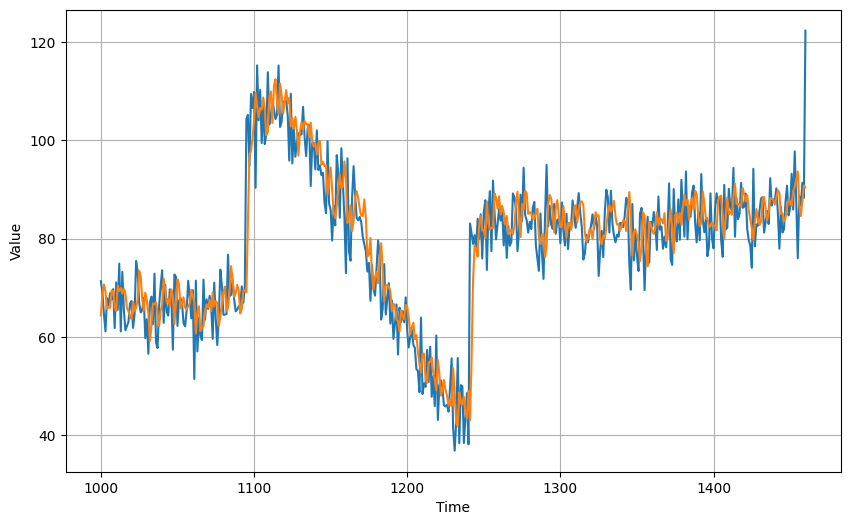

In [ ]:
# Preview shapes after using the conversion and squeeze methods
print(f'shape after converting to numpy array: {np.array(forecast).shape}')
print(f'shape after squeezing: {np.array(forecast).squeeze().shape}')

# Convert to a numpy array and drop single dimensional axes
results = np.array(forecast).squeeze()

# Overlay the results with the validation set
plot_series(time_valid, (x_valid, results))

In [ ]:
# Compute the metrics
print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, results).numpy())

48.544834
5.245407


In [ ]:
np.sqrt(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())/x_valid.mean()

0.08884615

### Same Model Using PyTorch

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset, random_split

In [ ]:
# Parameters
window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

In [ ]:
data =series
data = np.reshape(data, (-1,1))
data.shape

(1461, 1)

In [ ]:
# Create sequences and labels for training data
X, y = [], []
for i in range(len(series) - window_size):
    X.append(series[i:i+window_size])
y = series[window_size:]
X, y = np.array(X), np.array(y)

In [ ]:
X.shape

(1441, 20)

In [ ]:
X_train = X[:1000]
y_train = y[:1000]

X_val = X[1000:]
y_val = y[1000:]

In [ ]:
y_train = np.reshape(y_train, (-1,1))
y_val = np.reshape(y_val, (-1,1))

In [ ]:
# Convert data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_train = X_train.unsqueeze(2)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_train.shape,y_train.shape

(torch.Size([1000, 20, 1]), torch.Size([1000, 1]))

In [ ]:
# Convert data to PyTorch tensors
X_val = torch.tensor(X_val, dtype=torch.float32)
X_val = X_val.unsqueeze(2)
y_val = torch.tensor(y_val, dtype=torch.float32)

X_val.shape, y_val.shape

(torch.Size([441, 20, 1]), torch.Size([441, 1]))

In [ ]:
# Build the single layer neural network
class SimpleNN(nn.Module):
    def __init__(self, window_size):
        super(SimpleNN, self).__init__()
        self.linear = nn.Linear(window_size, 1)

    def forward(self, x):
        return self.linear(x)

In [ ]:
model = SimpleNN(window_size)

In [ ]:
# Set the training parameters
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-6, momentum=0.9)


In [ ]:
# Create DataLoader for batch training
train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Create DataLoader for batch training
val_dataset = torch.utils.data.TensorDataset(X_val, y_val)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
# Train the model
n_epochs = 100
for epoch in range(n_epochs):
    for features, labels in train_loader:
        features = features.view(-1, window_size)
        labels = labels.view(-1, 1)
        optimizer.zero_grad()
        output = model(features)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

In [ ]:
# Print the layer weights
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

linear.weight tensor([[-0.0691,  0.0322,  0.0571, -0.0378, -0.0181,  0.0480, -0.0322,  0.0331,
         -0.0454,  0.0494, -0.0362,  0.0240, -0.0511,  0.0452, -0.0108,  0.0886,
          0.0224,  0.1665,  0.2538,  0.4560]])
linear.bias tensor([-0.1963])


In [ ]:
# Initialize a list
forecast = []

# Use the model to predict data points per window size
with torch.no_grad():
    for time in range(len(series) - window_size):
        forecast.append(model(torch.tensor(series[time:time + window_size], dtype=torch.float32).view(1, -1)).item())


In [ ]:
# Slice the points that are aligned with the validation set
forecast = forecast[split_time - window_size:]

# Compare number of elements in the predictions and the validation set
print(f'length of the forecast list: {len(forecast)}')
print(f'shape of the validation set: {x_valid.shape}')

length of the forecast list: 461
shape of the validation set: (461,)


In [ ]:
forecast

[62.64235305786133,
 67.203369140625,
 67.33197784423828,
 65.03328704833984,
 61.880462646484375,
 65.29264068603516,
 63.38502883911133,
 65.87704467773438,
 65.6480941772461,
 66.230224609375,
 63.04830551147461,
 67.66542053222656,
 64.42103576660156,
 68.9124526977539,
 64.32611846923828,
 69.48887634277344,
 63.79198455810547,
 64.18169403076172,
 60.57017135620117,
 63.183902740478516,
 61.48624038696289,
 64.86298370361328,
 61.120201110839844,
 63.9026985168457,
 66.27872467041016,
 70.95001983642578,
 67.25061798095703,
 65.63798522949219,
 64.03257751464844,
 65.90025329589844,
 62.45057678222656,
 61.30384826660156,
 57.61455535888672,
 62.396827697753906,
 62.82670974731445,
 62.89482498168945,
 65.53038787841797,
 62.66507339477539,
 60.107688903808594,
 61.57173156738281,
 64.1201171875,
 68.66519927978516,
 65.40782928466797,
 66.48648071289062,
 64.19209289550781,
 64.38239288330078,
 65.801513671875,
 66.05806732177734,
 61.16170120239258,
 65.34579467773438,
 67.4819

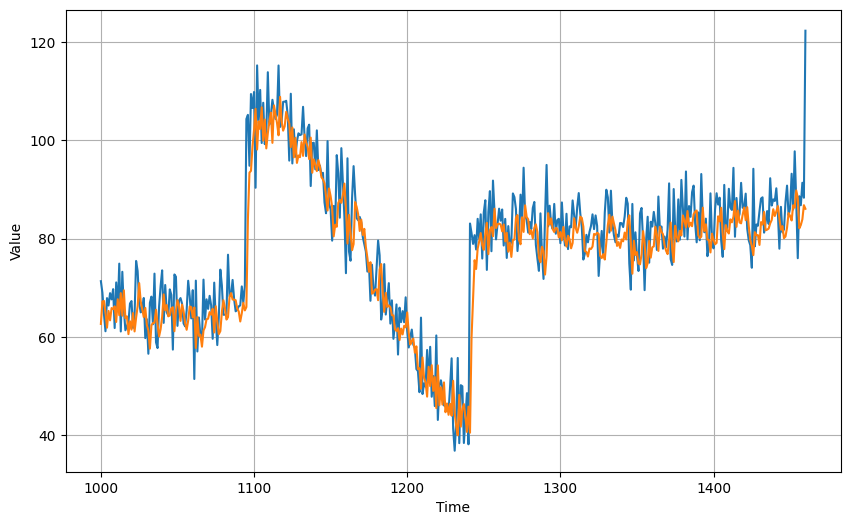

In [ ]:
# Convert to a numpy array
results = np.array(forecast)

# Overlay the results with the validation set
plot_series(time_valid, (x_valid, results))

In [ ]:
# Compute the metrics
mse = np.mean((results - x_valid) ** 2)
mae = np.mean(np.abs(results - x_valid))
print(f'MSE: {mse}')
print(f'MAE: {mae}')

# Compute the normalized root mean squared error
nrmse = np.sqrt(mse) / x_valid.mean()
print(f'NRMSE: {nrmse}')

MSE: 50.48251074931306
MAE: 5.193073322354066
NRMSE: 0.0906019533722376


Using any ML regression model

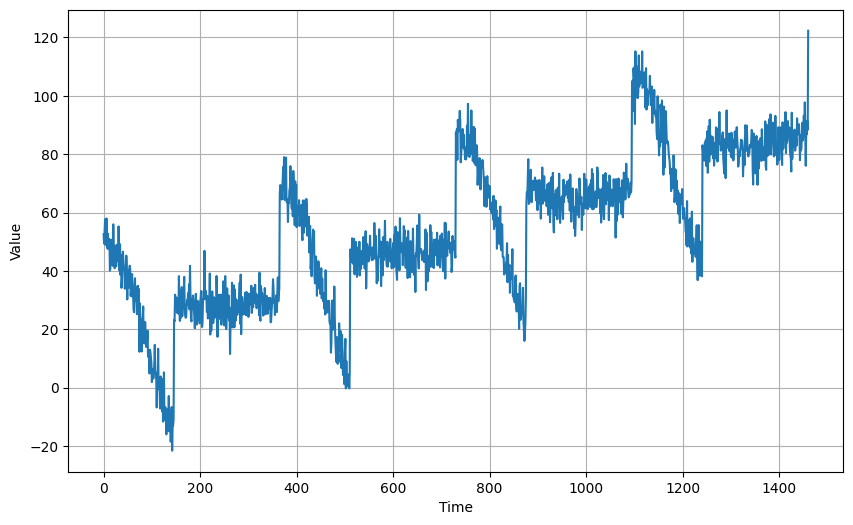

In [ ]:
### Generating Data

# Parameters
time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

# Update with noise
series += noise(time, noise_level, seed=42)

# Plot the results
plot_series(time, series)

In [ ]:
X_series = []
window_size = 15
for i in range(len(series) - window_size):
      X_series.append(series[i:i + window_size])

In [ ]:
X_series = np.array(X_series)

In [ ]:
# Define the split time
split_time = 1000

# Get the train set
time_train = time[window_size:split_time]
y_train = series[window_size:split_time]
X_train = X_series[:split_time-window_size]

print(X_train.shape)
print(y_train.shape)

# Get the validation set
time_valid = time[split_time:]
y_valid = series[split_time:]
X_valid = X_series[split_time-window_size:]
print(X_valid.shape)
print(y_valid.shape)

(985, 15)
(985,)
(461, 15)
(461,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_valid)

# Print the coefficients
print(f'Intercept: {model.intercept_}')
print(f'Coefficients: {model.coef_}')

# Compute and print evaluation metrics
mse = mean_squared_error(y_valid, y_pred)
mae = mean_absolute_error(y_valid, y_pred)
print(f'MSE: {mse}')
print(f'MAE: {mae}')

Intercept: 1.1208572387695312
Coefficients: [ 0.00697366 -0.02166289  0.00908592 -0.02170971  0.03574803 -0.01408961
  0.0026641  -0.04756549  0.0516839   0.0149441   0.06491477  0.01013779
  0.163015    0.2642095   0.45635873]
MSE: 45.226806640625
MAE: 4.9437127113342285


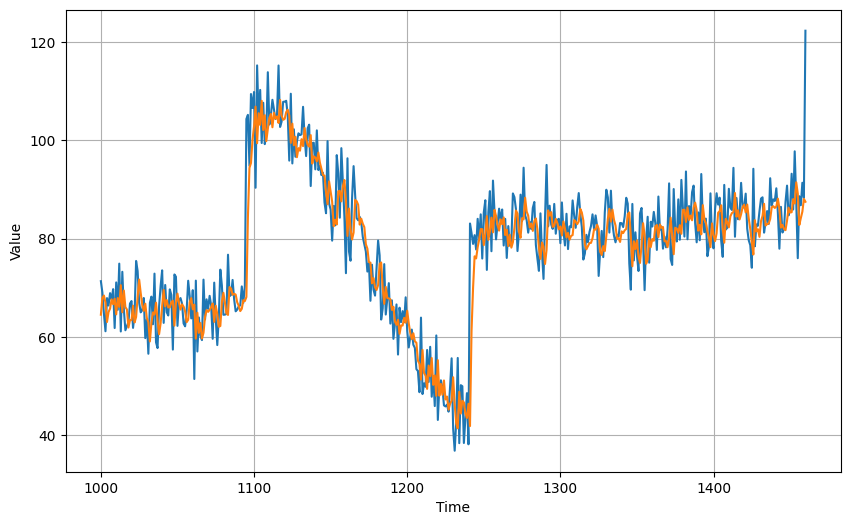

In [ ]:
plot_series(time_valid, (y_valid, y_pred))